In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.signal as signal
from time import perf_counter

import sys
import os

# Get the current notebook directory
notebook_dir = os.getcwd()  # Should be my_project/my_notebooks

# Go one level up (to my_project/)
project_root = os.path.abspath(os.path.join(notebook_dir, '..'))

# Path to the folder containing your module
module_dir = os.path.join(project_root, 'Processing_scripts')

# Add it to sys.path if it's not already there
if module_dir not in sys.path:
    sys.path.append(module_dir)

# Now import the module
import functions



#--------------------------------------------------------------------------------------------------
#Color generator
import colorsys

def generate_vivid_colors(x):
    """
    Generate x vivid and distinct RGB colors using evenly spaced hues in HSV.
    
    Args:
        x (int): Number of colors
    
    Returns:
        List of RGB tuples (r, g, b) with values in [0, 1]
    """
    colors = []
    for i in range(x):
        hue = i / x
        rgb = colorsys.hsv_to_rgb(hue, 1.0, 1.0)  # Full saturation & brightness
        colors.append(rgb)
    return colors
#--------------------------------------------------------------------------------------------------


# NB! per 22.04.25, SNR i `DEMON` er ikke egt SNR, bare verdien rett fra plottet

----------------------------------------
Best t_prosent : 57.563
----------------------------------------
tperseg      : 4
freq_filt    : 9
hfilt_length : 5
fds          : 550
----------------------------------------
----------------------------------------
Best t_prosent_sam : 5.7143
----------------------------------------
tperseg      : 4
freq_filt    : 7
hfilt_length : 25
fds          : 600
----------------------------------------


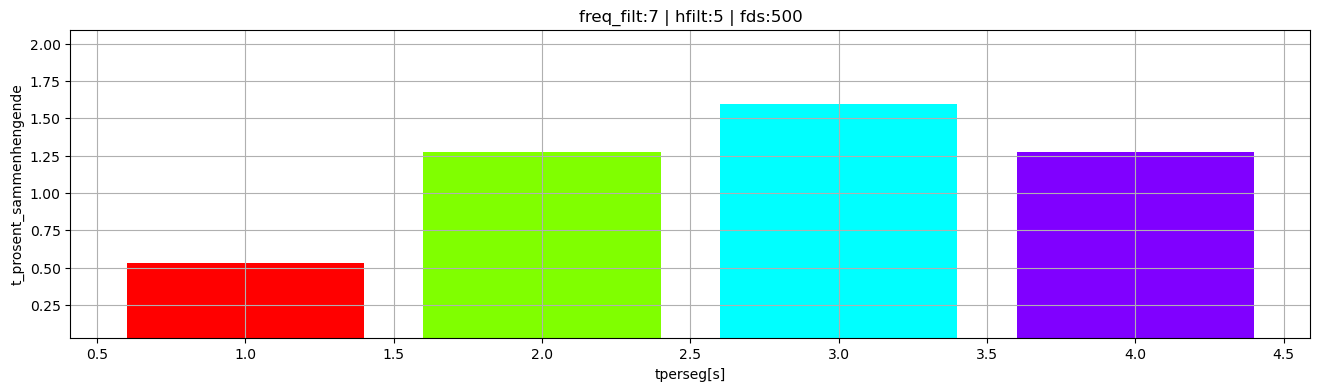

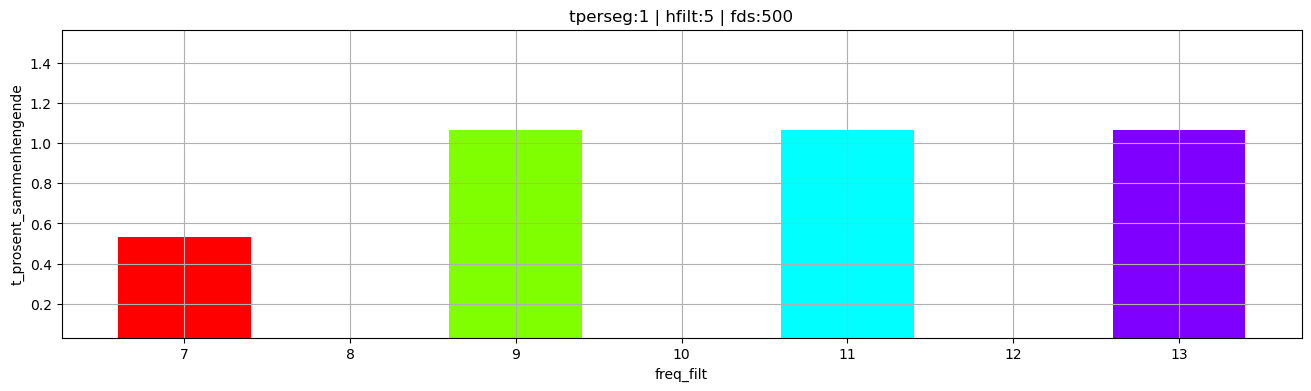

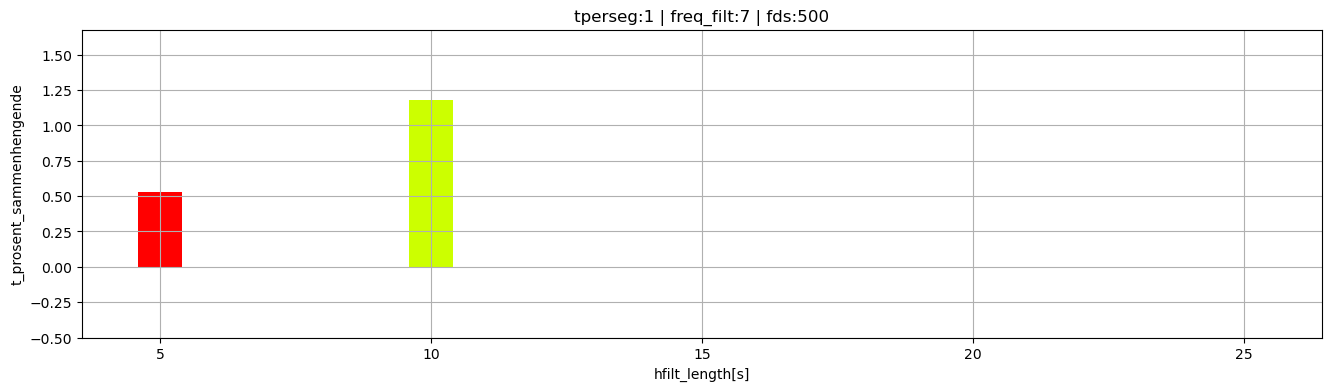

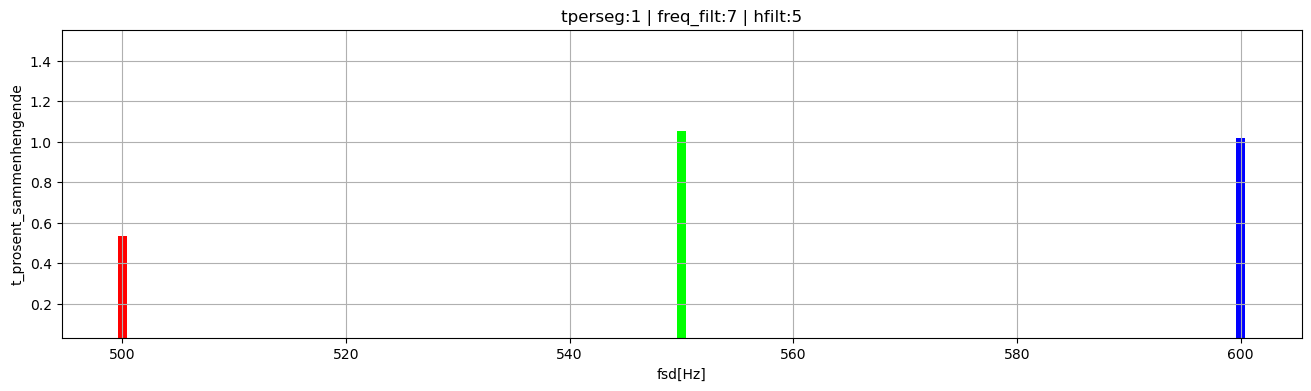

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

fs = 10_000

#Read csv file
df = pd.read_csv("/Users/christofferaaseth/Documents/GitHub/hydrophonic-detection/data/Proc-opt/DEMON_avg_SNR.csv")

# Hent unike verdier (sortert for konsistent rekkefølge)
tperseg_vals = sorted(df["tperseg"].unique())
freq_filt_vals = sorted(df["freq_filt"].unique())
hfilt_length_vals = sorted(df["hfilt_length"].unique())
fds_vals = sorted(df["fds"].unique())

# Lag mapping fra verdi til indeks
tperseg_map = {val: idx for idx, val in enumerate(tperseg_vals)}
freq_filt_map = {val: idx for idx, val in enumerate(freq_filt_vals)}
hfilt_length_map = {val: idx for idx, val in enumerate(hfilt_length_vals)}
fds_map = {val: idx for idx, val in enumerate(fds_vals)}

# Lag tomt array med riktig dimensjon
shape = (len(tperseg_vals), len(freq_filt_vals), len(hfilt_length_vals), len(fds_vals))
num_tperseg_iterations = shape[0]
num_freq_filt_iterations = shape[1]
num_hfilt_length_iterations = shape[2]
num_fds_iterations = shape[3]

max_SNR = np.zeros(shape)
t_prosent = np.zeros(shape)
t_prosent_sammenhengende = np.zeros(shape)
time = np.zeros(shape)

# Fyll arrayet med verdier, bruk mapping for å finne riktig posisjon
for _, row in df.iterrows():
    a = tperseg_map[row["tperseg"]]
    b = freq_filt_map[row["freq_filt"]]
    c = hfilt_length_map[row["hfilt_length"]]
    d = fds_map[row["fds"]]
    max_SNR[a, b, c, d] = row["max_SNR"]
    time[a,b,c,d] = row["time"]
    t_prosent[a,b,c,d] = row["t_prosent"]
    t_prosent_sammenhengende[a,b,c,d] = row["t_prosent_sammenhengende"]

##############################################################################################################################################################################
#Plot 
def Barplot_against_x(d4_arr,y_label:str):
    tperseg_idx = 0
    freq_filt_idx = 0
    hfilt_length_idx = 0
    fds_idx = 0


    tperseg_colors = generate_vivid_colors(num_tperseg_iterations)
    tperseg_fig = plt.figure(figsize=(16,4))

    plt.bar(tperseg_vals,d4_arr[:,freq_filt_idx,hfilt_length_idx,fds_idx],color=tperseg_colors)
    plt.xlabel("tperseg[s]")
    plt.ylabel(y_label)
    plt.ylim((np.min(d4_arr[:,freq_filt_idx,hfilt_length_idx,fds_idx])-0.5,np.max(d4_arr[:,freq_filt_idx,hfilt_length_idx,fds_idx])+0.5))
    plt.title(f"freq_filt:{freq_filt_vals[freq_filt_idx]} | hfilt:{hfilt_length_vals[hfilt_length_idx]} | fds:{fds_vals[fds_idx]}")
    plt.grid()



    freq_filt_colors = generate_vivid_colors(num_freq_filt_iterations)
    freq_filt_fig = plt.figure(figsize=(16,4))

    plt.bar(freq_filt_vals,d4_arr[tperseg_idx,:,hfilt_length_idx,fds_idx],color=freq_filt_colors)
    plt.xlabel("freq_filt")
    plt.ylabel(y_label)
    plt.ylim((np.min(d4_arr[tperseg_idx,:,hfilt_length_idx,fds_idx])-0.5,np.max(d4_arr[tperseg_idx,:,hfilt_length_idx,fds_idx])+0.5))
    plt.title(f"tperseg:{tperseg_vals[tperseg_idx]} | hfilt:{hfilt_length_vals[hfilt_length_idx]} | fds:{fds_vals[fds_idx]}")
    plt.grid()



    hfilt_length_colors = generate_vivid_colors(num_hfilt_length_iterations)
    hfilt_length_fig = plt.figure(figsize=(16,4))

    plt.bar(hfilt_length_vals,d4_arr[tperseg_idx,freq_filt_idx,:,fds_idx],color=hfilt_length_colors)
    plt.xlabel("hfilt_length[s]")
    plt.ylabel(y_label)
    plt.ylim((np.min(d4_arr[tperseg_idx,freq_filt_idx,:,fds_idx])-0.5,np.max(d4_arr[tperseg_idx,freq_filt_idx,:,fds_idx])+0.5))
    plt.title(f"tperseg:{tperseg_vals[tperseg_idx]} | freq_filt:{freq_filt_vals[freq_filt_idx]} | fds:{fds_vals[fds_idx]}")
    plt.grid()



    fds_colors = generate_vivid_colors(num_fds_iterations)
    fds_fig = plt.figure(figsize=(16,4))

    plt.bar(fds_vals,d4_arr[tperseg_idx,freq_filt_idx,hfilt_length_idx,:],color=fds_colors)
    plt.xlabel("fsd[Hz]")
    plt.ylabel(y_label)
    plt.ylim((np.min(d4_arr[tperseg_idx,freq_filt_idx,hfilt_length_idx,:])-0.5,np.max(d4_arr[tperseg_idx,freq_filt_idx,hfilt_length_idx,:])+0.5))
    plt.title(f"tperseg:{tperseg_vals[tperseg_idx]} | freq_filt:{freq_filt_vals[freq_filt_idx]} | hfilt:{hfilt_length_vals[hfilt_length_idx]}")
    plt.grid()
    return 0

y_label = "t_prosent_sammenhengende"
Barplot_against_x(t_prosent_sammenhengende, y_label)



##############################################################################################################################################################################
#Best values

t_prosent_row_max = df.loc[df["t_prosent"].idxmax()]

print("----------------------------------------")
print(f"Best t_prosent : {t_prosent_row_max["t_prosent"]}")
print("----------------------------------------")
print(f"tperseg      : {int(t_prosent_row_max["tperseg"])}")
print(f"freq_filt    : {int(t_prosent_row_max["freq_filt"])}")
print(f"hfilt_length : {int(t_prosent_row_max["hfilt_length"])}")
print(f"fds          : {int(t_prosent_row_max["fds"])}")
print("----------------------------------------")

t_prosent_sammenhengende_row_max = df.loc[df["t_prosent_sammenhengende"].idxmax()]

print("----------------------------------------")
print(f"Best t_prosent_sam : {t_prosent_sammenhengende_row_max["t_prosent_sammenhengende"]}")
print("----------------------------------------")
print(f"tperseg      : {int(t_prosent_sammenhengende_row_max["tperseg"])}")
print(f"freq_filt    : {int(t_prosent_sammenhengende_row_max["freq_filt"])}")
print(f"hfilt_length : {int(t_prosent_sammenhengende_row_max["hfilt_length"])}")
print(f"fds          : {int(t_prosent_sammenhengende_row_max["fds"])}")
print("----------------------------------------")
